In [5]:
import numpy as np 
import pandas as pd 

from matplotlib.ticker import FuncFormatter

# loop over results to take taxes into account
def vermogensbelasting_2016(capital):
    return max(0, 0.012 * (capital-24437))

def vermogensbelasting_2017(capital):
    taxable = capital - 25000
    if taxable < 0:
        return 0
    
    schijf_1 = min(75000, taxable)
    schijf_2 = max(min(975000, taxable)-75000, 0)
    schijf_3 = max(taxable - 975000, 0)
    
    return (0.02871 * schijf_1 + 0.04600 * schijf_2 + 0.0539 * schijf_3) * 0.30

def vermogensbelasting_2018(capital):
    taxable = capital - 30000
    if taxable < 0:
        return 0
    
    schijf_1 = min(70800, taxable)
    schijf_2 = max(min(978000, taxable)-70800, 0)
    schijf_3 = max(taxable - 978000, 0)
    
    return (0.02017 * schijf_1 + 0.04326 * schijf_2 + 0.0538 * schijf_3) * 0.30

df = pd.DataFrame(data={
    'belasting (2016)': 0, 
    'belasting (2017)': 0,
    'belasting (2018)': 0 
}, index=np.linspace(0, 1000000, 21))
df.index.name = 'vermogen'

for idx in df.index:
    df.loc[idx, 'belasting (2016)'] = int(vermogensbelasting_2016(idx))
    df.loc[idx, 'belasting (2017)'] = int(vermogensbelasting_2017(idx))
    df.loc[idx, 'belasting (2018)'] = int(vermogensbelasting_2018(idx))

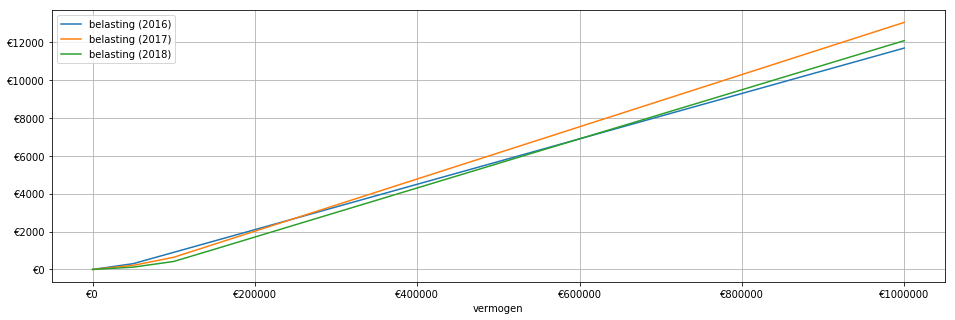

In [4]:
ax = df.plot(grid=True, figsize=(16,5))
ax_formatter = FuncFormatter(lambda v, _: '€{:.0f}'.format(v))
ax.yaxis.set_major_formatter(ax_formatter) 
ax.xaxis.set_major_formatter(ax_formatter) 

In [3]:
df

,belasting (2016),belasting (2017),belasting (2018)
vermogen,,,
0.0,0,0,0
50000.0,306,215,121
100000.0,906,645,423
150000.0,1506,1335,1066
200000.0,2106,2025,1715
250000.0,2706,2715,2364
300000.0,3306,3405,3013
350000.0,3906,4095,3662
400000.0,4506,4785,4311
